# Weather Data Analysis:

## 1. Understanding and Utilizing Weather Data

### Introduction:

Weather data plays a crucial role in our daily lives and various industries, from agriculture to transportation and emergency preparedness. Understanding and effectively utilizing weather data can help individuals and organizations make informed decisions, improve safety, and optimize operations.

Weather data encompasses a wide range of information collected from various sources, including meteorological stations, satellites, weather balloons, and weather radars. The key types of weather data include:

- __Temperature:__ Information about the current and forecasted temperature, which impacts clothing choices, heating and cooling needs, and agricultural practices.

- __Precipitation:__ Data on rainfall, snowfall, and other forms of precipitation, critical for water resource management, flood forecasting, and agricultural planning.

- __Humidity:__ Measures the amount of moisture in the air, influencing human comfort, crop health, and weather patterns.

- __Wind Speed and Direction:__ Wind data is vital for aviation, renewable energy generation, and understanding weather patterns.

- __Atmospheric Pressure:__ Information about the pressure exerted by the atmosphere, useful for weather predictions and altimeter settings for aviation.

- __Cloud Cover:__ Indicates the fraction of the sky covered by clouds and helps determine potential rainfall and solar radiation.

- __UV Index:__ Measures the strength of ultraviolet radiation from the sun, important for skin protection and outdoor activities.

In [35]:
# Importing required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [36]:
# Importing the dataset

df = pd.read_csv('Weather Data.csv')
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [37]:
# Check the info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [38]:
df.shape

(8784, 8)

## 2. Data Cleaning

In [39]:
# Let's look if there are any null values present in the dataset

df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

The dataset looks good. It doesn't have any null values.

In [40]:
# Let's check the datatypes

df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

The datatype of Date/Time is Object type. So, let's change the datatype to datetime

In [41]:
# Change datatype of 'Date/Time'

df["Date/Time"] = pd.to_datetime(df["Date/Time"])
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [42]:
# Let's seperate the month from Date/Time

df["Month"] = df["Date/Time"].dt.month

In [43]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Month
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1


Now Let's look at 'Weather' column

In [44]:
df.Weather.value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

Everything looks good in this column.  

## 3. Exploratory Data Analysis

`The agenda for Exploratory data analysis is to analyse various factors that change according to the weather condition`

Let's create a function to visualize these factors changing according to weather.

In [45]:
# Creating a function 'visuals'

def visuals(Data):
    plt.style.use("default")
    plt.figure(figsize=[20,13])
    
    # plot 1
    plt.subplot(2,2,1)
    sns.barplot(y="Temp_C", x="Month", data=Data, palette="autumn_r")
    plt.title("Temperature range throughout year 2012",color="Brown",fontsize=15)
    
    # plot 2
    plt.subplot(2,2,2)
    sns.kdeplot(data=Data, x="Rel Hum_%", hue="Month", fill=True, common_norm=False, palette="flare",alpha=.6, linewidth=0)
    plt.title("Humidity Percentage",color="Brown",fontsize=15)
    
    # plot 3
    plt.subplot(2,2,3)
    sns.boxplot(data=Data, y="Wind Speed_km/h", x='Month', palette="mako_r")
    plt.title("Wind speed in km/hr",color="Brown",fontsize=15)
    
    # plot 4
    plt.subplot(2,2,4)
    sns.barplot(y="Dew Point Temp_C", x="Month", data=Data, palette="autumn_r")
    plt.title("Dew Point Temperature throughout the year",color="Brown",fontsize=15)
    

    plt.show()

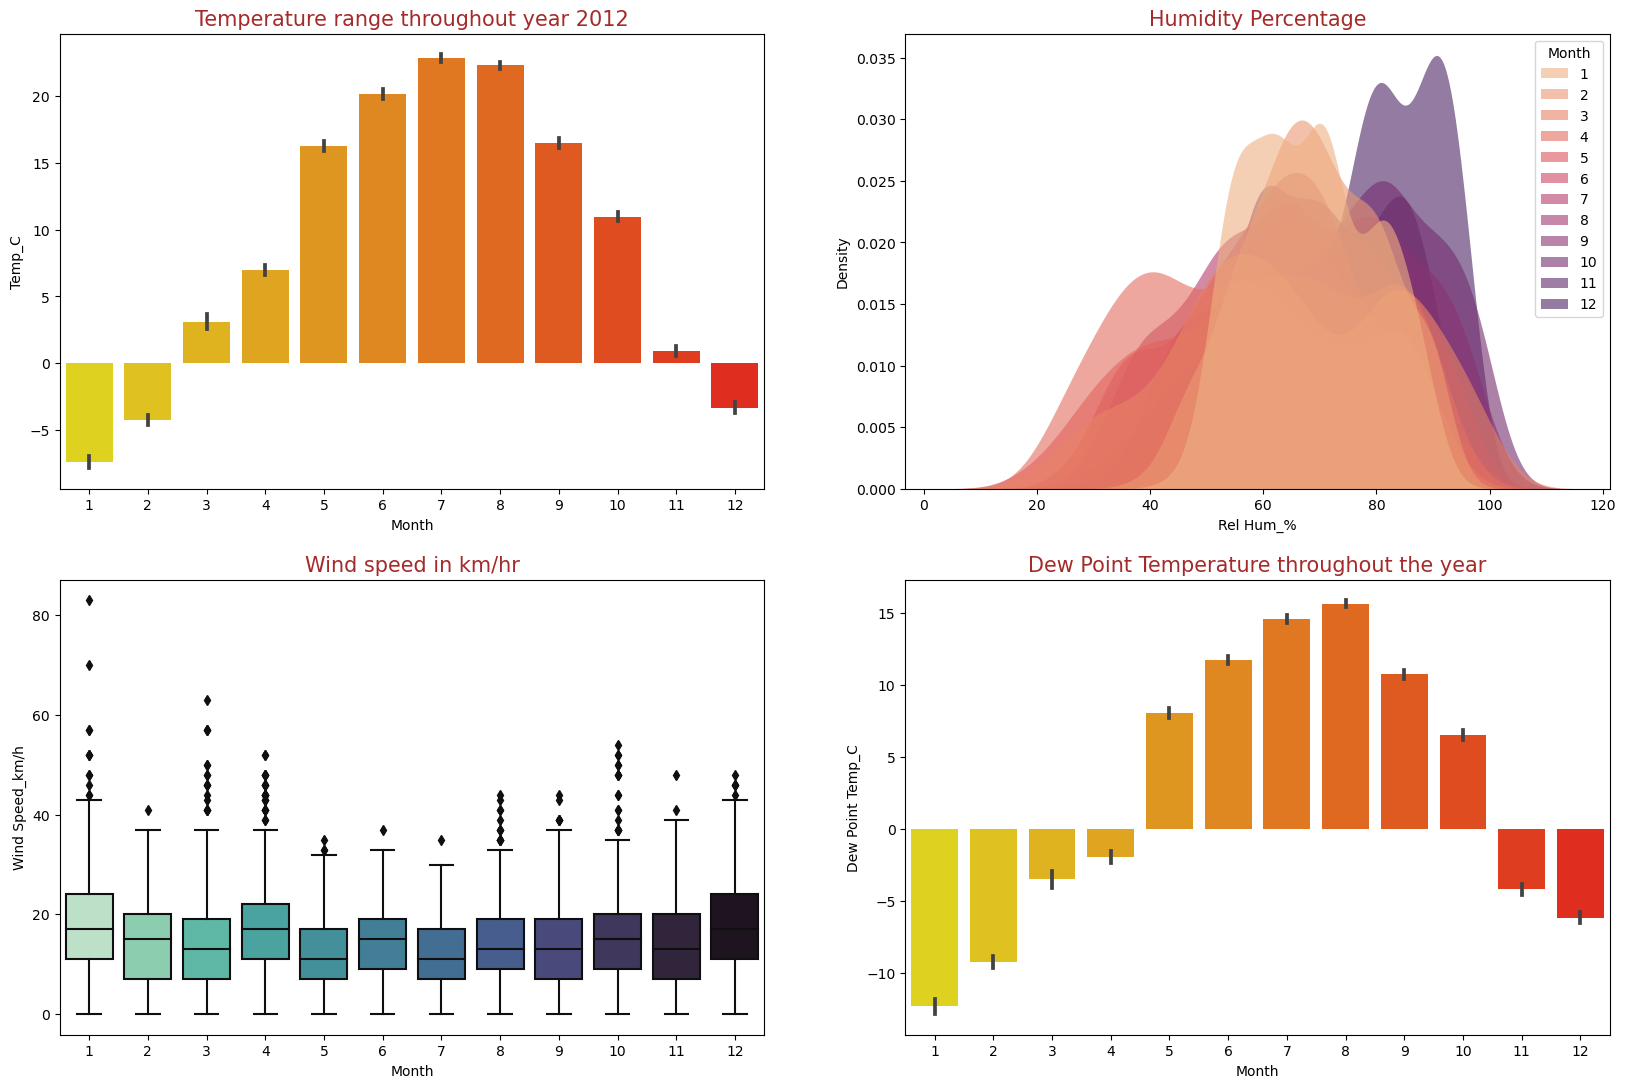

In [46]:
# Let's see the visuals for whole dataset
visuals(df)

- ## Analysis for Clear weather 

Here we can create a seperaate dataframe which includes 'clear' and 'mostly clear' weather to use it for the analysis of conditions on days when the weather is clear.

In [47]:
# Create a dataframe df_clear
# Lambda function to filter rows containing 'Clear' in the 'Weather' column
df_clear = df[df['Weather'].apply(lambda x: 'Clear' in x)]

In [48]:
df_clear.Weather.value_counts()

Mainly Clear    2106
Clear           1326
Name: Weather, dtype: int64

In [49]:
# Check the shape
df_clear.shape

(3432, 9)

So, there are 3432 entries ofs clear weather.

In [50]:
df_clear.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Month
count,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000
mean,10.343823,2.846008,62.147145,12.758741,32.676282,101.379659,6.625583
std,12.577530,11.615842,16.035361,7.961841,11.419263,0.708526,3.116595
min,-23.300000,-28.500000,20.000000,0.000000,11.300000,98.670000,1.000000
25%,0.100000,-6.700000,51.000000,7.000000,25.000000,100.890000,4.000000
50%,13.100000,6.000000,63.000000,11.000000,25.000000,101.370000,7.000000
75%,20.900000,12.500000,74.000000,17.000000,48.300000,101.820000,9.000000
max,33.000000,21.200000,99.000000,63.000000,48.300000,103.630000,12.000000


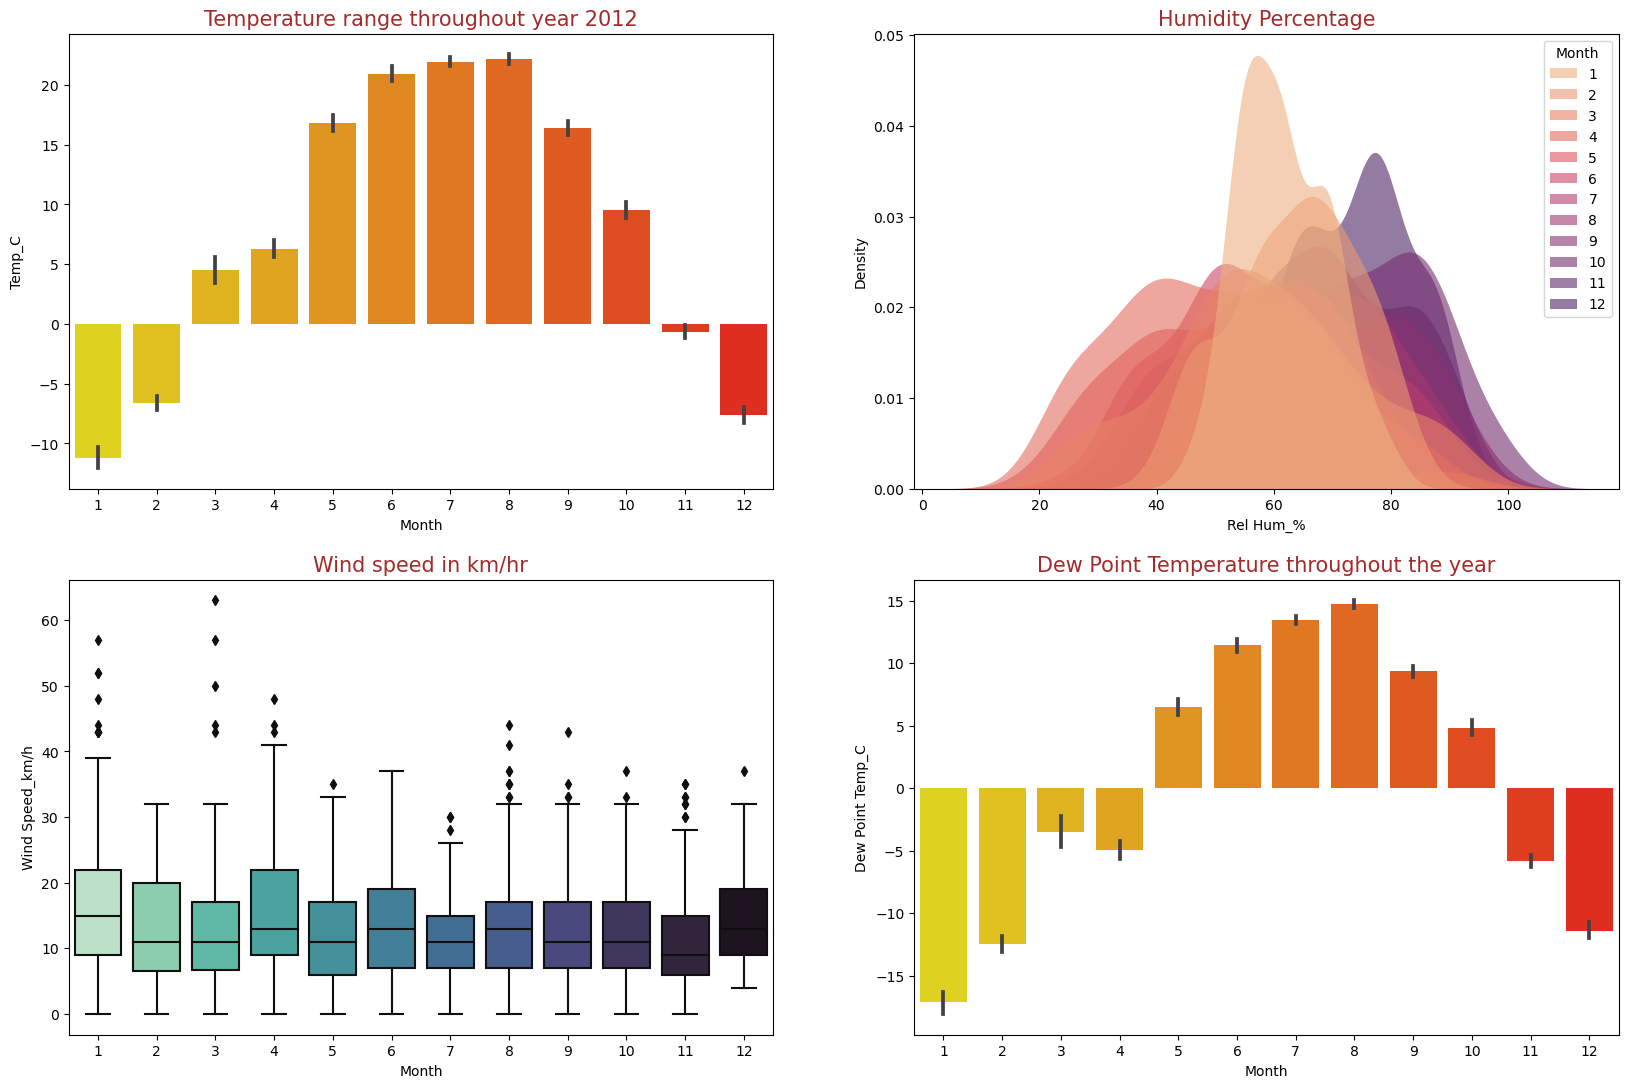

In [51]:
# Let's see the visuals of conditions for days when the weather was Clear 
visuals(df_clear)

- __On clear days, the `Temperature` generally ranges from `15°C to 25°C`. In January and December, the temperature fell down upto `-23°C`__
- __January, February and December months had the maximum `Humidity` in the whole year.__
- __The `Wind Speed` in clear weather is common throughout the year which lies in range of `10 to 20 km/hr`.__
- __On clear days, the lowest `Dew Point Temperature` fell down to `-28°C` in January.__

- ## Analysis for Rainy weather 

For doing the analysis of Rainy weather, we will make a seperate dataframe which contains all the records where it rained.

In [52]:
# Create a dataframe df_rain
# Lambda function to filter rows containing 'Rain' in the 'Weather' column
df_rain = df[df['Weather'].apply(lambda x: 'Rain' in x)]

In [53]:
# Check weather types
df_rain.Weather.value_counts()

Rain                                       306
Rain Showers                               188
Rain,Fog                                   116
Rain,Snow                                   18
Thunderstorms,Rain Showers                  16
Freezing Rain                               14
Rain,Snow,Ice Pellets                        4
Freezing Rain,Fog                            4
Rain,Haze                                    3
Thunderstorms,Rain                           3
Thunderstorms,Rain Showers,Fog               3
Freezing Rain,Haze                           2
Rain Showers,Snow Showers                    2
Freezing Rain,Snow Grains                    1
Thunderstorms,Rain,Fog                       1
Thunderstorms,Moderate Rain Showers,Fog      1
Rain Showers,Fog                             1
Rain,Snow,Fog                                1
Moderate Rain,Fog                            1
Freezing Rain,Ice Pellets,Fog                1
Rain,Ice Pellets                             1
Rain,Snow Gra

In [54]:
# Many different entries of weather when it rained. Let's check shape of dataframe.
df_rain.shape

(689, 9)

In [55]:
# Describe the dataset df_rain
df_rain.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Month
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,10.175036,7.309724,83.319303,18.069666,17.017271,100.305835,6.915820
std,7.437764,7.095544,11.283333,9.097554,7.947451,0.755952,3.289147
min,-6.500000,-9.000000,37.000000,0.000000,2.000000,97.520000,1.000000
25%,3.800000,1.000000,77.000000,13.000000,9.700000,99.790000,4.000000
50%,9.200000,6.600000,86.000000,17.000000,19.300000,100.380000,6.000000
75%,16.300000,12.900000,92.000000,22.000000,24.100000,100.800000,10.000000
max,26.400000,23.100000,100.000000,52.000000,48.300000,102.310000,12.000000


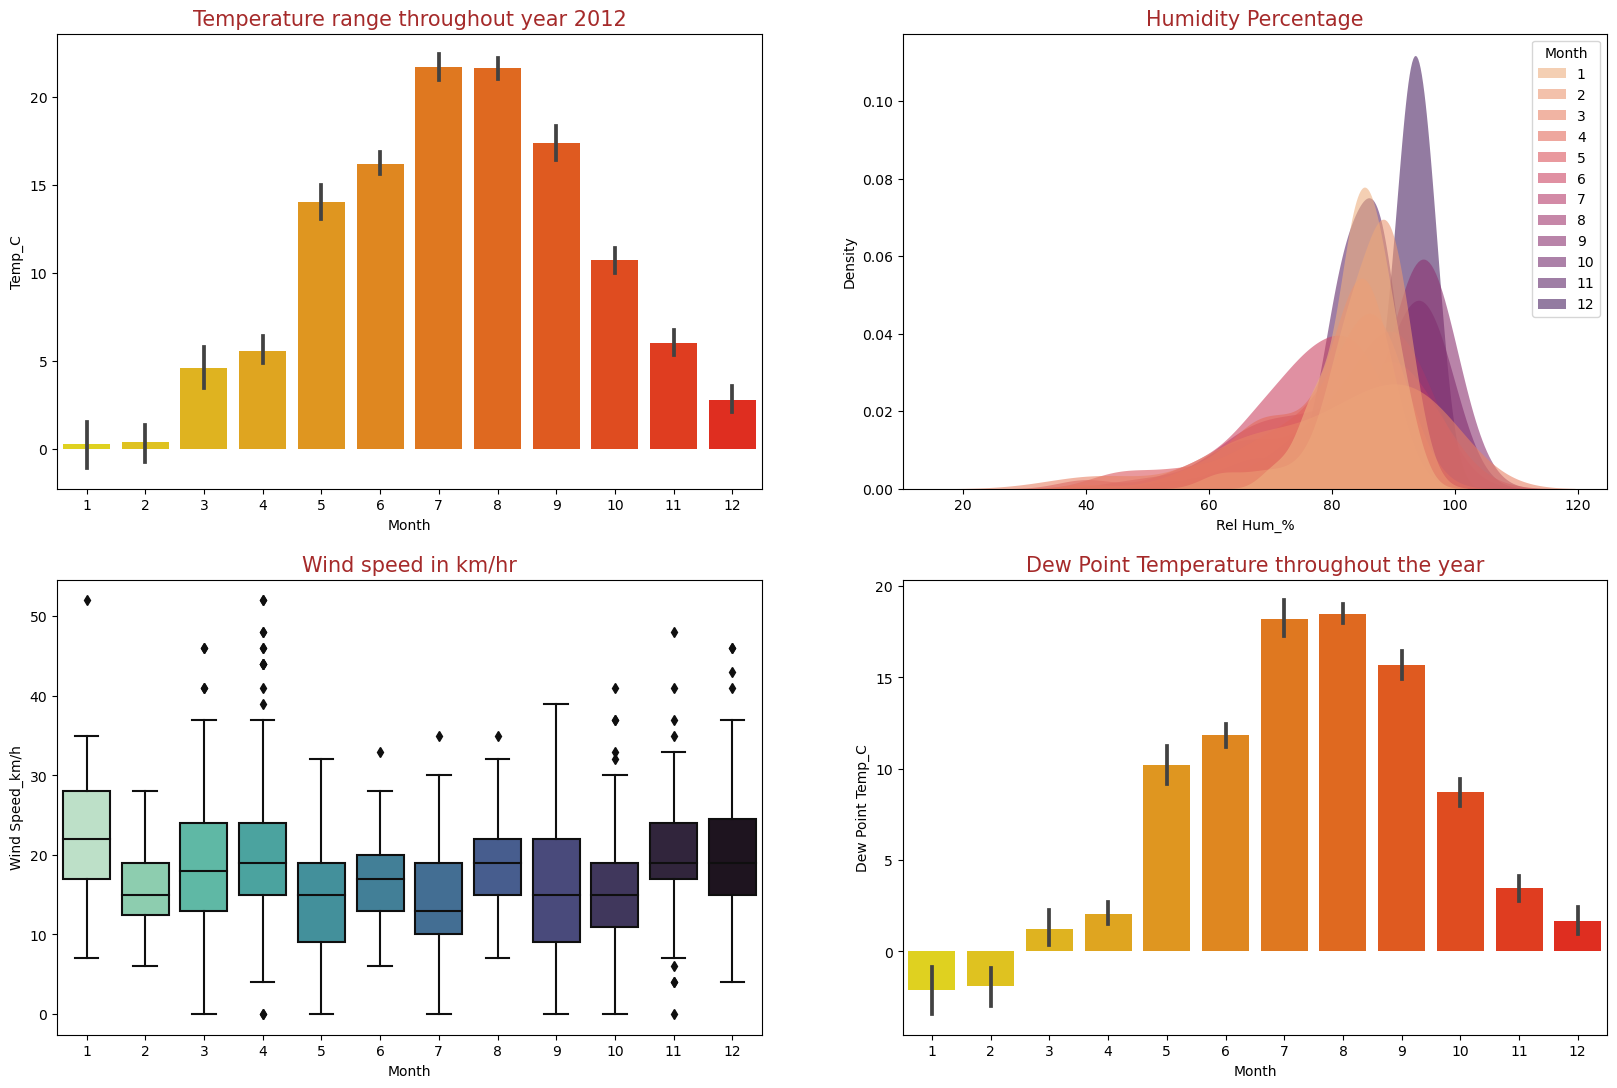

In [56]:
# Visualize various factors in df_rain
visuals(df_rain)

- __On Rainy days, the `Temperature` was comparatively high going highest upto `26.4°C`.__
- __Maximum `Humidity` was experienced in `November` and `December` with highest humidity percentage `100%` .__
- __The `Wind Speed` was fluctuating when it rained as compared to the clear days. The average wind speed of `18.06 km/hr`.__
- __`Dew Point Temperature` was also high when it rained.__

- ## Analysis for Cloudy weather 

Create a dataframe df_cloudy which includes all the entries when the weather was `Cloudy`.

In [57]:
# Create dataframe df_cloudy
# Lambda function to filter rows containing 'Cloudy' in the 'Weather' column
df_cloudy = df[df['Weather'].apply(lambda x: 'Cloudy' in x)]

In [58]:
# Check weather types
df_cloudy.Weather.value_counts()

Mostly Cloudy    2069
Cloudy           1728
Name: Weather, dtype: int64

In [59]:
df_cloudy.shape

(3797, 9)

In [60]:
# Describe the dataset df_rain
df_cloudy.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Month
count,3797.000000,3797.000000,3797.000000,3797.000000,3797.000000,3797.000000,3797.000000
mean,9.389334,2.787411,65.511193,15.956545,29.147617,100.973476,6.506189
std,11.245238,10.766587,15.643981,8.409717,10.340799,0.801164,3.431749
min,-23.200000,-28.500000,18.000000,0.000000,11.300000,98.360000,1.000000
25%,1.200000,-5.100000,55.000000,9.000000,24.100000,100.470000,4.000000
50%,10.000000,3.000000,67.000000,15.000000,25.000000,100.970000,6.000000
75%,19.000000,12.000000,78.000000,20.000000,25.000000,101.470000,10.000000
max,32.400000,24.400000,100.000000,83.000000,48.300000,103.650000,12.000000


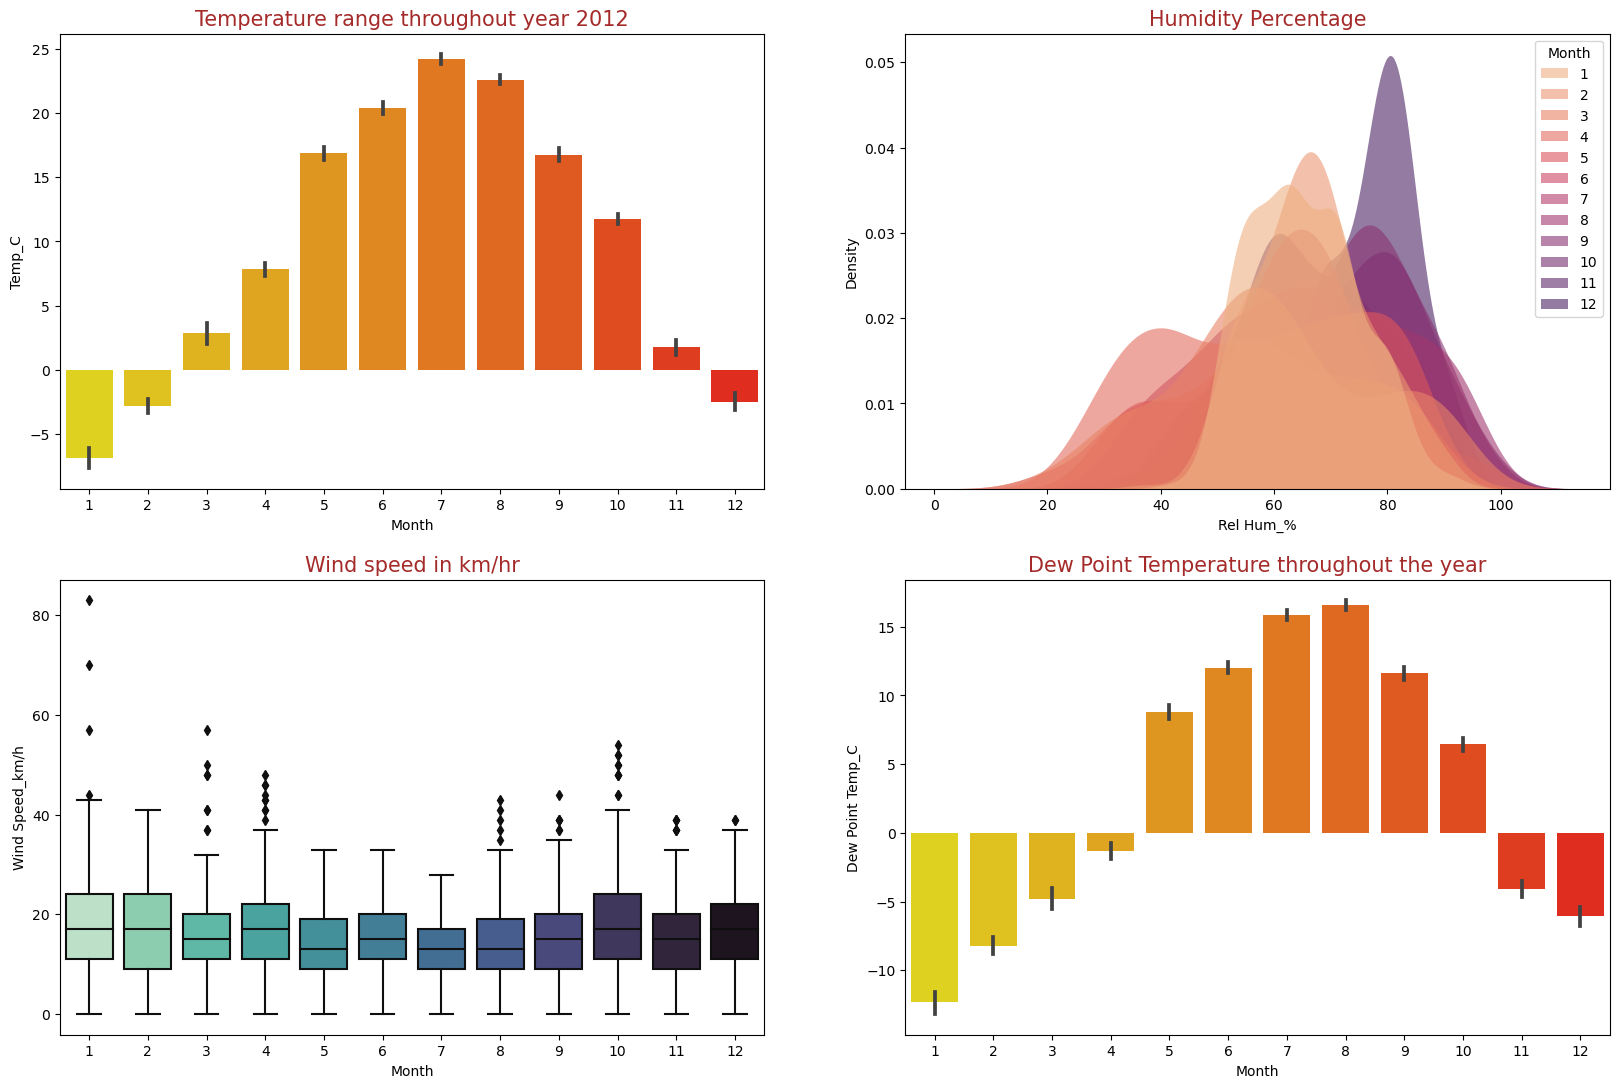

In [61]:
# Visualize various factors in df_cloudy
visuals(df_cloudy)

- __Temperature ranges was common in `Cloudy` weather.__
- __Average Humidity was observed, maximum in `January` and `December`.__
- __The `Wind Speed` was in average range without much fluctuations.__
- __The `Dew Point Temperature` was comparatively low with average `2.78°C` and minimum of `-28.5°C`.__

- ### Analysis for Snowy weather 

Now let's look at the days when it was snowing. Create a new dataframe to include all the entries where weather condition was 'Snow'.

In [64]:
# Create dataframe df_snow
# Lambda function to filter rows containing 'Snow' in the 'Weather' column
df_snow = df[df['Weather'].apply(lambda x: 'Snow' in x)]

In [65]:
# Check weather types
df_snow.Weather.value_counts()

Snow                          390
Snow Showers                   60
Snow,Fog                       37
Snow,Blowing Snow              19
Rain,Snow                      18
Drizzle,Snow,Fog               15
Freezing Drizzle,Snow          11
Snow,Ice Pellets                6
Snow,Haze                       5
Moderate Snow                   4
Rain,Snow,Ice Pellets           4
Snow Showers,Fog                4
Rain Showers,Snow Showers       2
Drizzle,Snow                    2
Moderate Snow,Blowing Snow      2
Freezing Rain,Snow Grains       1
Snow Pellets                    1
Rain,Snow,Fog                   1
Rain,Snow Grains                1
Name: Weather, dtype: int64

In [66]:
df_snow.shape

(583, 9)

In [67]:
# Describe the dataset df_snow
df_snow.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Month
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,-4.099657,-6.992110,80.730703,20.413379,10.972213,100.513602,5.481990
std,4.214302,4.991113,10.113677,10.491150,8.552342,0.971829,4.937333
min,-16.700000,-24.600000,41.000000,0.000000,0.600000,97.750000,1.000000
25%,-6.900000,-10.200000,75.000000,13.000000,3.600000,100.005000,1.000000
50%,-4.400000,-6.900000,82.000000,20.000000,8.000000,100.610000,2.000000
75%,0.150000,-2.800000,88.000000,28.000000,19.300000,101.150000,12.000000
max,3.700000,0.800000,99.000000,57.000000,48.300000,102.730000,12.000000


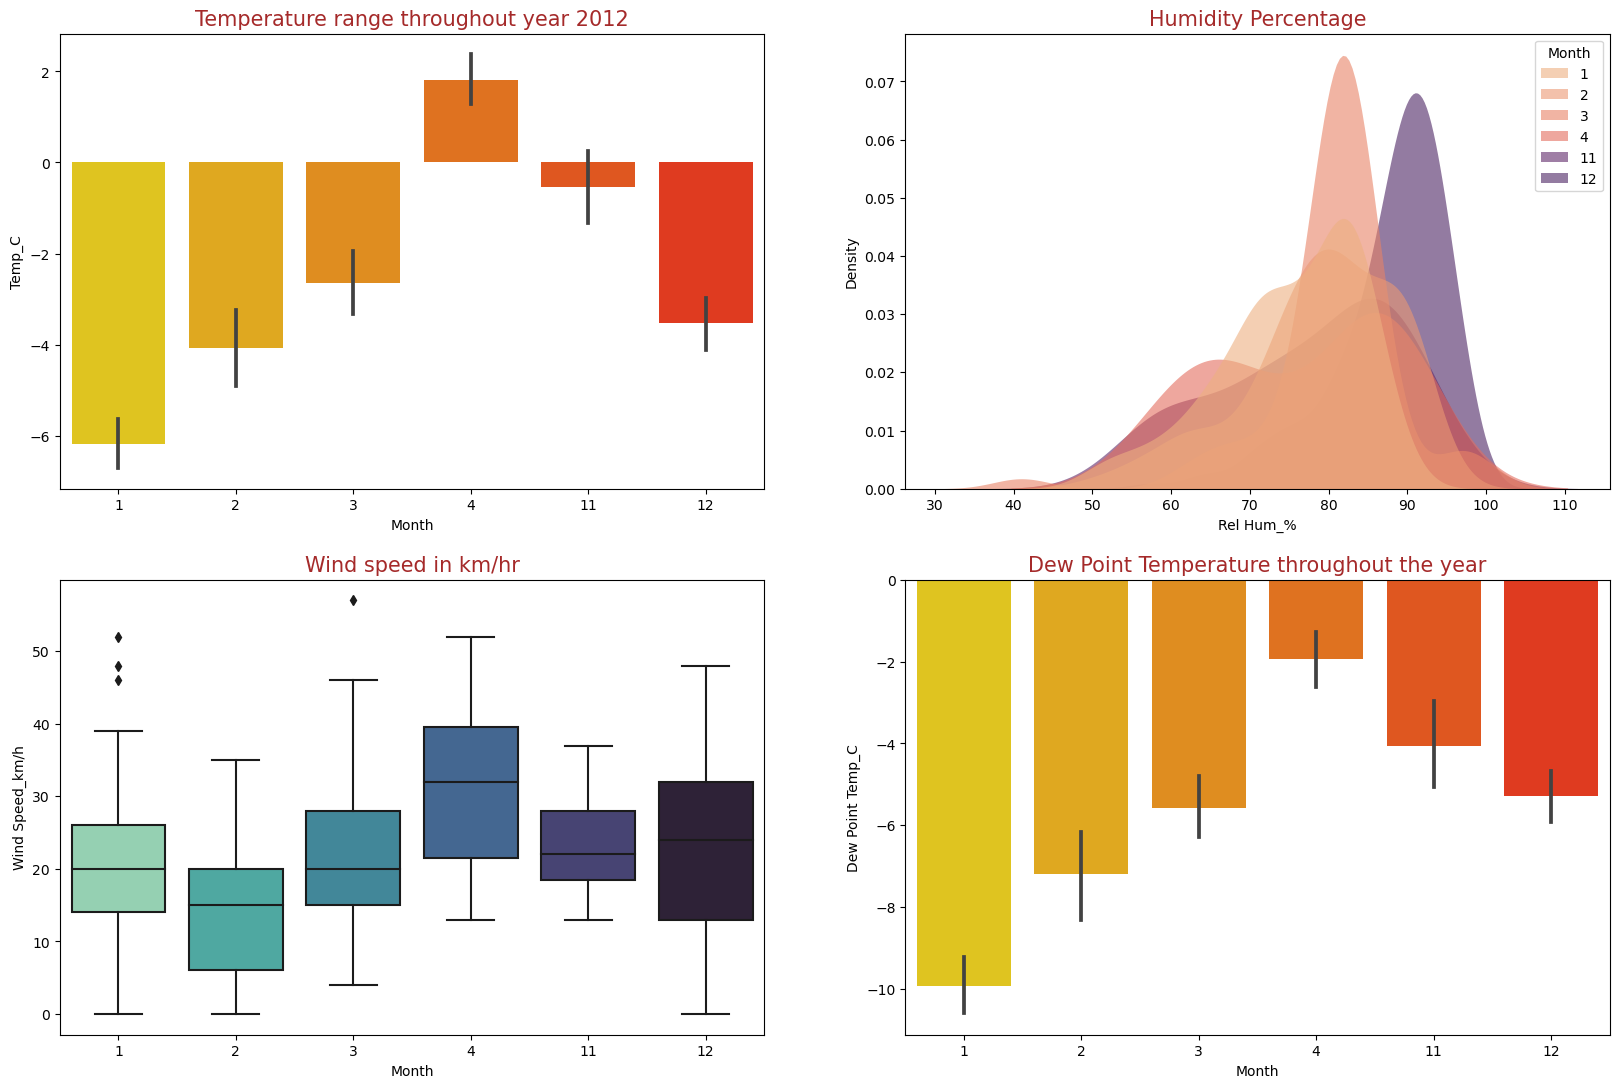

In [30]:
# Visualize various factors in df_snow
visuals(df_snow)

- __Snow was experienced in months like January, February, March, April, November and December.__ 
- __The `Temperature` was negative on the days when snow was experienced, with lowest temperature of `-16.7°C`.__
- __`Wind Speed` was preety high with average of `20.4 km/hr`.__
- __`Dew Point Temperature` as compared to other months with average of `-6.99°C` and minimum temperature of `-24.6°C`.__